In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import sklearn

In [6]:
from catboost import CatBoostClassifier

# EDA

## 1. An initial look at the data

In [7]:
train_data = pd.read_csv("train.csv", low_memory=False)
train_data.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [8]:
train_data.shape

(100000, 28)

In [9]:
print(train_data.columns.values)

['ID' 'Customer_ID' 'Month' 'Name' 'Age' 'SSN' 'Occupation'
 'Annual_Income' 'Monthly_Inhand_Salary' 'Num_Bank_Accounts'
 'Num_Credit_Card' 'Interest_Rate' 'Num_of_Loan' 'Type_of_Loan'
 'Delay_from_due_date' 'Num_of_Delayed_Payment' 'Changed_Credit_Limit'
 'Num_Credit_Inquiries' 'Credit_Mix' 'Outstanding_Debt'
 'Credit_Utilization_Ratio' 'Credit_History_Age' 'Payment_of_Min_Amount'
 'Total_EMI_per_month' 'Amount_invested_monthly' 'Payment_Behaviour'
 'Monthly_Balance' 'Credit_Score']


In [10]:
train_data.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10139
Age                           1788
SSN                          12501
Occupation                      16
Annual_Income                18940
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                    434
Type_of_Loan                  6260
Delay_from_due_date             73
Num_of_Delayed_Payment         749
Changed_Credit_Limit          4384
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             13178
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91049
Payment_Behaviour                7
Monthly_Balance              98792
Credit_Score                     3
dtype: int64

In [11]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [12]:
train_data.duplicated().sum()

0

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [14]:
train_data.describe(include='object').T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


## 2) Cleaning the data and Nans handling

In [15]:
df = train_data

In [16]:
df.isna().sum()[df.isna().sum() > 0]

Name                        9985
Monthly_Inhand_Salary      15002
Type_of_Loan               11408
Num_of_Delayed_Payment      7002
Num_Credit_Inquiries        1965
Credit_History_Age          9030
Amount_invested_monthly     4479
Monthly_Balance             1200
dtype: int64

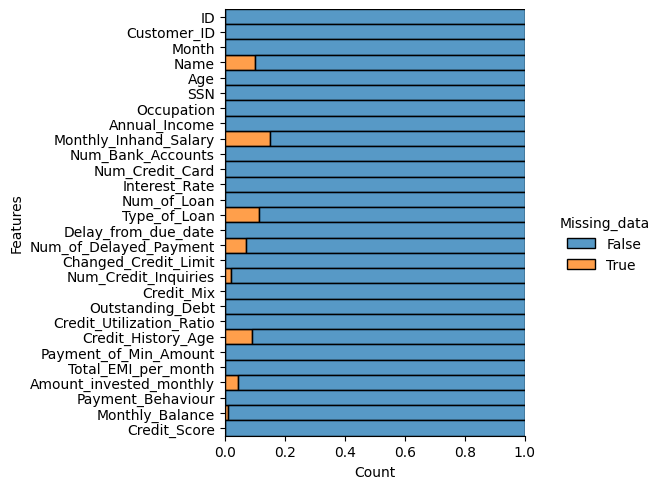

In [17]:
def na_ratio_plot(df=df):

    sns.displot(df.isna().melt(value_name='Missing_data',var_name='Features')\
                ,y='Features',hue='Missing_data',multiple='fill',aspect=9/8)

na_ratio_plot()

#### Mapping the months column

In [18]:
month_map = {"January" : 1,"February" : 2,"March" : 3,"April" : 4,"May" : 5,"June" : 6,"July" : 7,"August" : 8}
df["Month"] =df["Month"].map(month_map)

#### Cleaning the Age column of non-numeric values, replacing extremals

In [19]:
def clean_age(age):
    try:
        age = int(age)
        if age > 100:
            age = 100
        if age < 14:
            age = 14
        return age
    except ValueError:
        return np.nan

df['Age'] = df['Age'].str.replace('_', '').str.replace('-', '')
df['Age'] = df['Age'].apply(clean_age)

<Axes: xlabel='Age'>

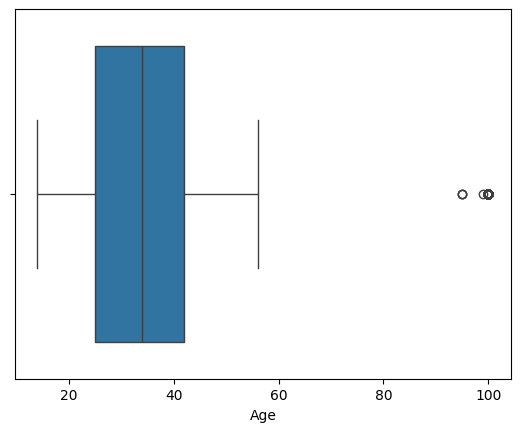

In [20]:
sns.boxplot(data= df, x= df.Age)

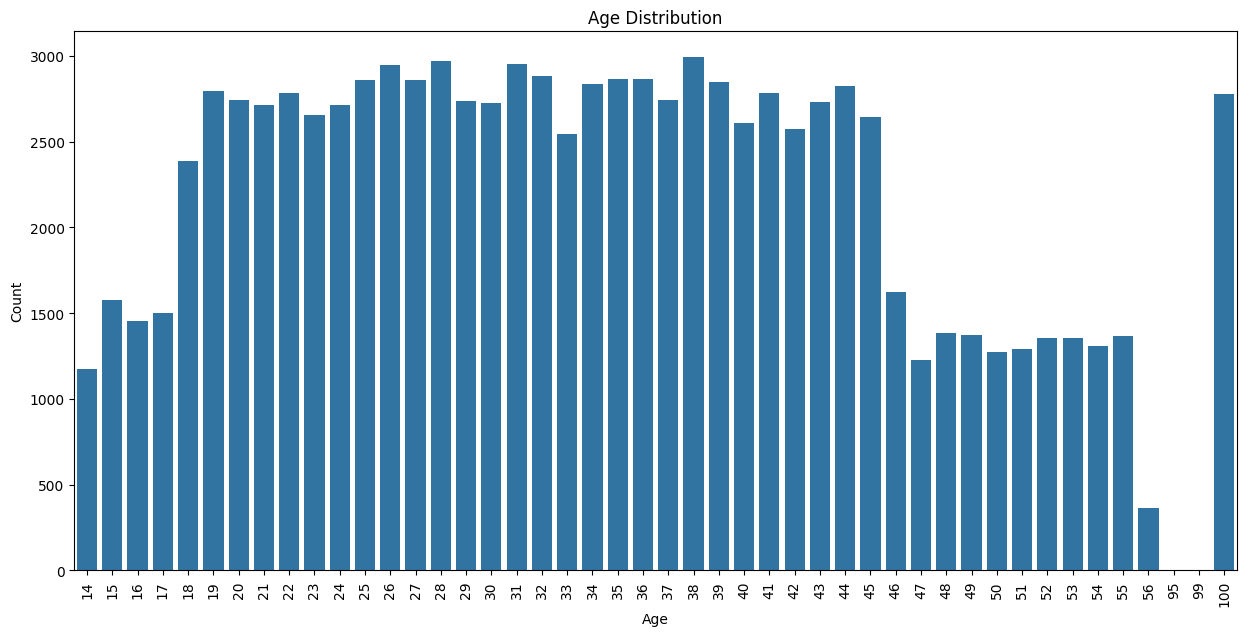

In [21]:
plt.figure(figsize=(15, 7))
sns.countplot(x='Age', data=df)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)  
plt.show()

#### Filling nans in occupation column

In [22]:
df.Occupation.value_counts()

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

In [23]:
df.Occupation.isna().sum()

0

Text(0.5, 0, 'Occupation')

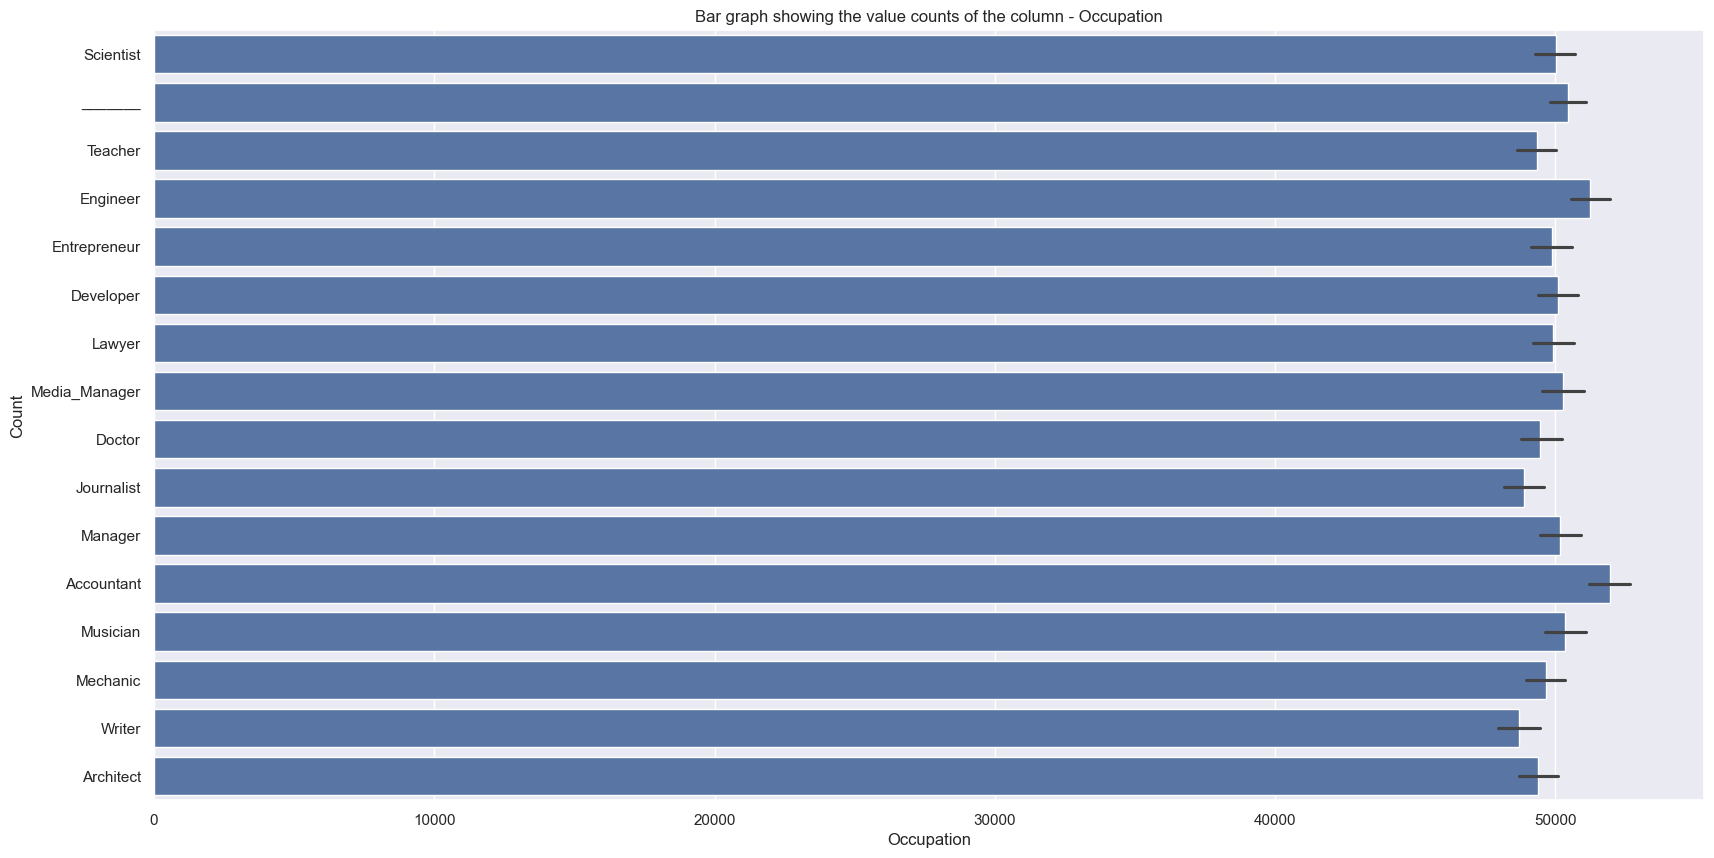

In [24]:
sns.set(rc={'figure.figsize': (20, 10)})
sns.barplot(x=df["Occupation"].index, y=df["Occupation"].values)
plt.title('Bar graph showing the value counts of the column - Occupation')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Occupation', fontsize=12)

In [25]:
def fill_occupation_by_ssn(df):
    # Replace '_______' values ​​in 'Occupation' column with NaN (empty) values
    df['Occupation'] = df['Occupation'].replace('_______', np.nan)
    
    # Find the most recurring 'Occupation' values ​​for each SNN number
    most_common_occupation_by_ssn = df.groupby('SSN')['Occupation'].apply(lambda x: x.mode().iloc[0])
    
    # 'Populating '_______' values ​​in 'Occupation' column
    for index, row in df.iterrows():
        if pd.isnull(row['Occupation']) and row['SSN'] in most_common_occupation_by_ssn:
            df.at[index, 'Occupation'] = most_common_occupation_by_ssn[row['SSN']]


fill_occupation_by_ssn(df)

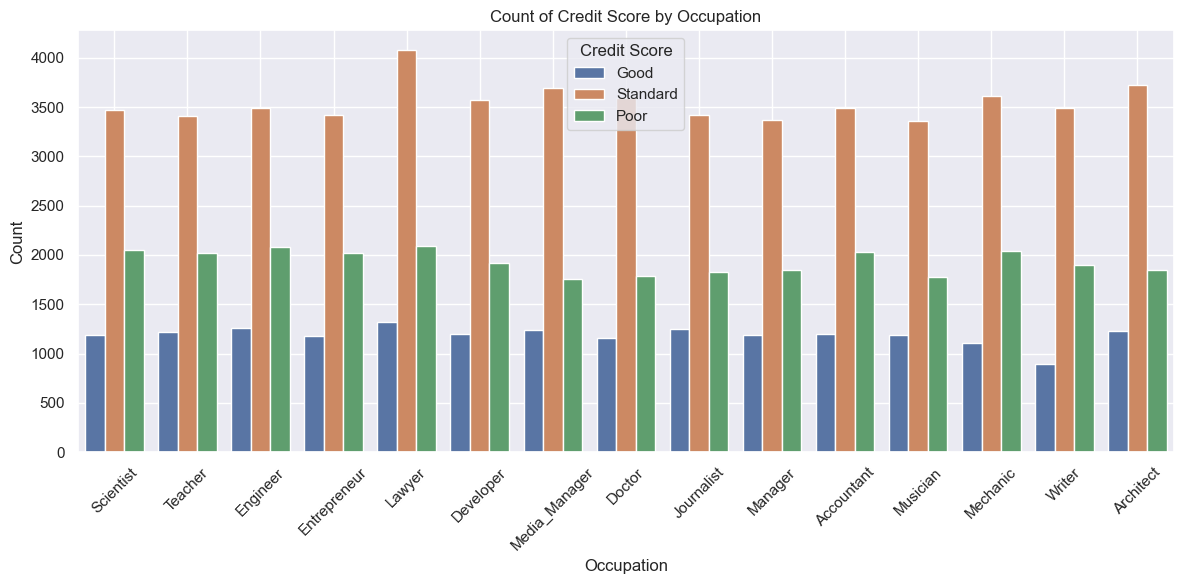

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Occupation', hue='Credit_Score', data=df)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Count of Credit Score by Occupation')
plt.xticks(rotation=45)
plt.legend(title='Credit Score')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Removing trailing dash in Annual Income column

In [27]:
def remove_trailing_dash(value):
    if isinstance(value, str) and value.endswith('_'):
        return value[:-1] 
    else:
        return value


df['Annual_Income'] = df['Annual_Income'].apply(remove_trailing_dash)

In [28]:
df['Annual_Income'] = df['Annual_Income'].astype(float)

In [29]:
df['Annual_Income'].unique()

array([ 19114.12,  34847.84, 143162.64, ...,  37188.1 ,  20002.88,
        39628.99])

<Axes: xlabel='Annual_Income'>

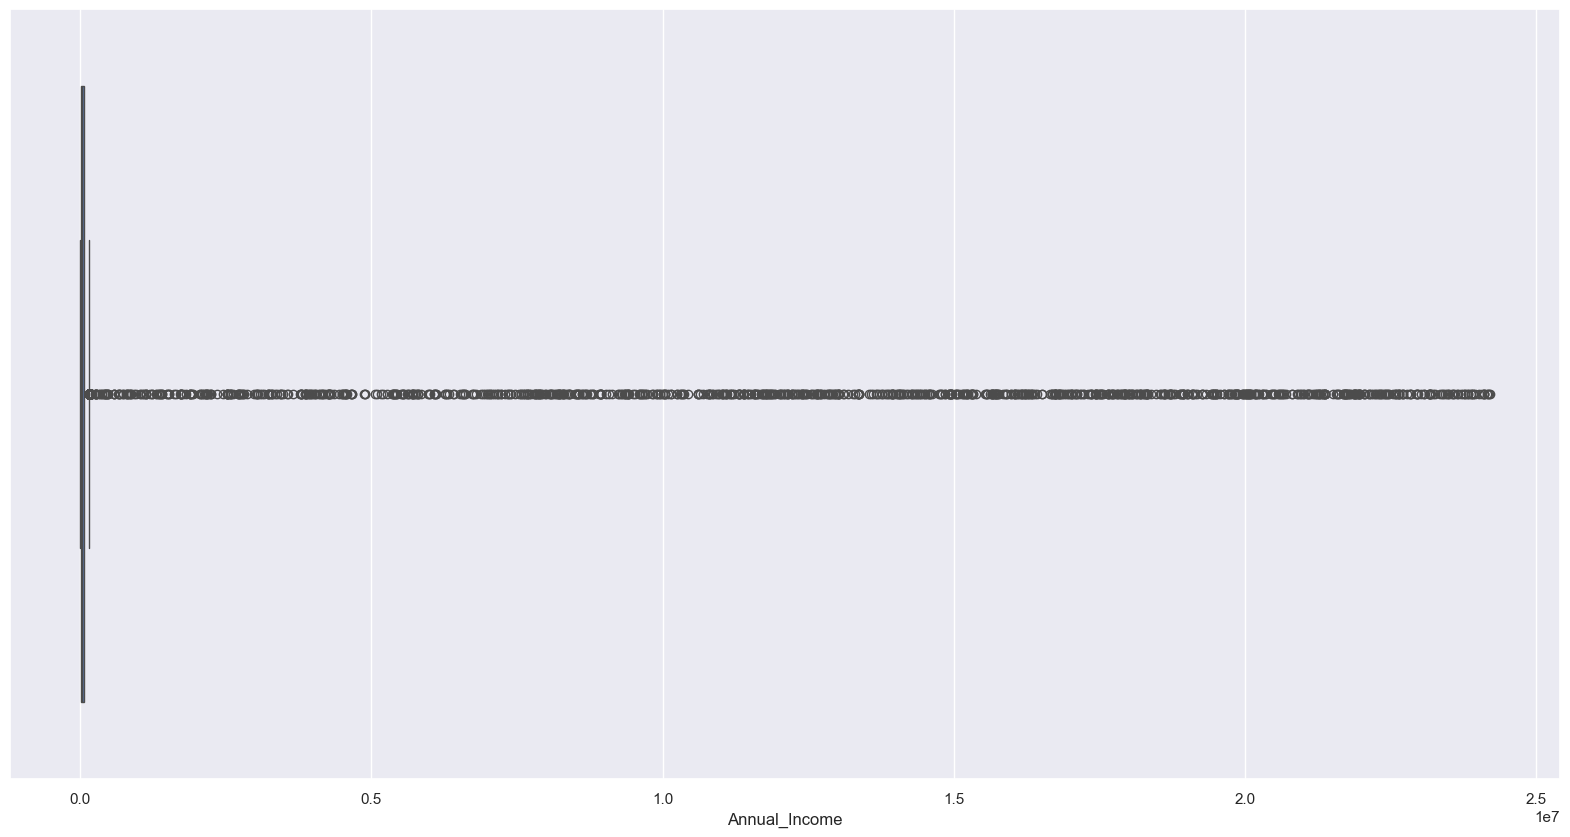

In [30]:
sns.boxplot(x = 'Annual_Income', data = df)

#### Filling breaches in Monthly_Ihhand_Salary column by mode of this with current Customer_ID

In [31]:
Customer_Mode_Salary = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(lambda x : x.mode().iloc[0])
df['Monthly_Inhand_Salary'] = np.where(df['Monthly_Inhand_Salary'].isnull(), Customer_Mode_Salary, df['Monthly_Inhand_Salary'])

Text(0.5, 1.0, 'Customer Monthly Salary Distribution')

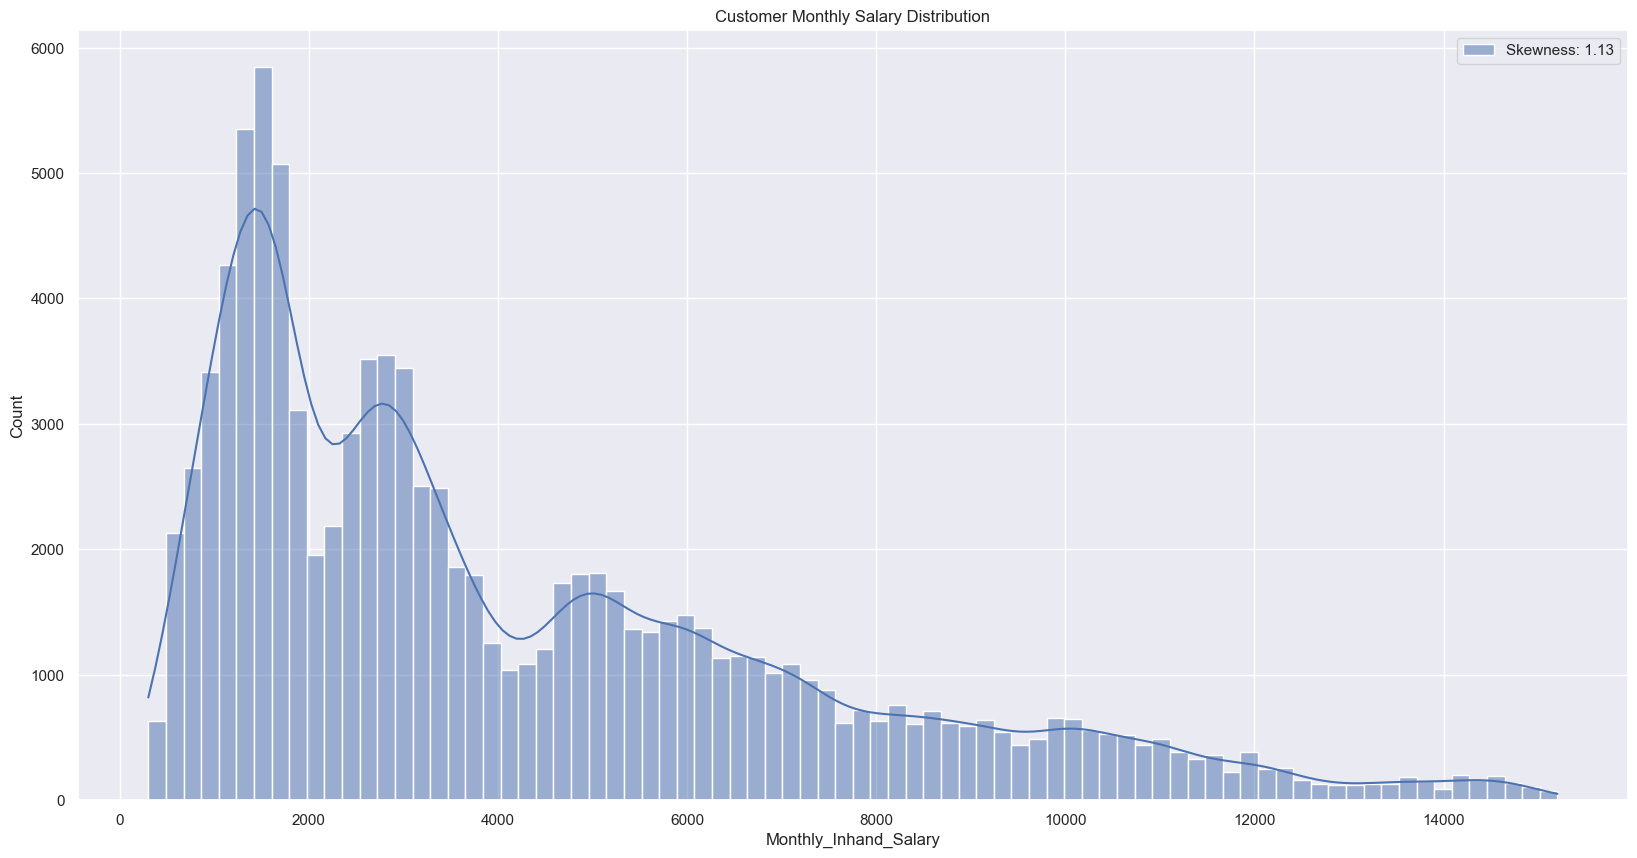

In [32]:
sns.histplot(df['Monthly_Inhand_Salary'], label = 'Skewness: %.2f'%(df['Monthly_Inhand_Salary'].skew()), kde=True)
plt.legend(loc = 'best')
plt.title('Customer Monthly Salary Distribution')

#### Cleaning the Num_of_Loan column of '-' and '_' symbols

In [33]:
df['Num_of_Loan'].unique()

array(['4', '1', '3', '967', '-100', '0', '0_', '2', '3_', '2_', '7', '5',
       '5_', '6', '8', '8_', '9', '9_', '4_', '7_', '1_', '1464', '6_',
       '622', '352', '472', '1017', '945', '146', '563', '341', '444',
       '720', '1485', '49', '737', '1106', '466', '728', '313', '843',
       '597_', '617', '119', '663', '640', '92_', '1019', '501', '1302',
       '39', '716', '848', '931', '1214', '186', '424', '1001', '1110',
       '1152', '457', '1433', '1187', '52', '1480', '1047', '1035',
       '1347_', '33', '193', '699', '329', '1451', '484', '132', '649',
       '995', '545', '684', '1135', '1094', '1204', '654', '58', '348',
       '614', '1363', '323', '1406', '1348', '430', '153', '1461', '905',
       '1312', '1424', '1154', '95', '1353', '1228', '819', '1006', '795',
       '359', '1209', '590', '696', '1185_', '1465', '911', '1181', '70',
       '816', '1369', '143', '1416', '455', '55', '1096', '1474', '420',
       '1131', '904', '89', '1259', '527', '1241', '449', 

In [34]:
def clean_num(num):
    num = num.strip("-_")  
    return num
df["Num_of_Loan"] = df["Num_of_Loan"].apply(clean_num)
most_common_value = df["Num_of_Loan"].mode()[0]
df["Num_of_Loan"] = df["Num_of_Loan"].fillna(most_common_value)

#### Replacing nans in Type_of_Loan column by "Unknown"

In [35]:
df.fillna({'Type_of_Loan':'Unknown'}, inplace=True)

In [36]:
loan_type_groups = df.groupby('Type_of_Loan').size()
print(loan_type_groups)

Type_of_Loan
Auto Loan                                                                                                                                    1152
Auto Loan, Auto Loan, Auto Loan, Auto Loan, Credit-Builder Loan, Credit-Builder Loan, Mortgage Loan, and Personal Loan                          8
Auto Loan, Auto Loan, Auto Loan, Auto Loan, Student Loan, and Student Loan                                                                      8
Auto Loan, Auto Loan, Auto Loan, Credit-Builder Loan, Payday Loan, Not Specified, Payday Loan, Student Loan, and Debt Consolidation Loan        8
Auto Loan, Auto Loan, Auto Loan, Not Specified, Debt Consolidation Loan, and Credit-Builder Loan                                                8
                                                                                                                                            ...  
Student Loan, and Not Specified                                                                                

#### Cleaning the Num_of_Delayed_Payment column of '-' and '_' symbols

In [37]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna('0')
def remove_special_characters(value):
    if isinstance(value, str):
       
        value = value.strip('_').strip('-')
    return value
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(
    remove_special_characters)

#### Cleaning the Changed_Credit_Limit column of '-' and '_' symbols and filling nans by median

In [38]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('-', np.nan)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('_', np.nan)
df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce')
mean_value = df['Changed_Credit_Limit'].mean()
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].fillna(mean_value)

#### Filling nans in Num_Credit_Inquires column by zero

In [39]:
df['Num_Credit_Inquiries'].unique()
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(0)

#### Filling nans in Credit_Mix column by mode of current Customer. If there is no data about Credit_Mix of current customer, fill by global mode

In [40]:
credit_mix_count = df['Credit_Mix'].value_counts()
credit_mix_count

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

In [41]:
df['Credit_Mix'] = df['Credit_Mix'].replace('_', np.nan)

def fill_na_cat(data, val):
  
    for col in data.select_dtypes(include='object').columns:
        mode_by_customer = data.groupby('Customer_ID')[col].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
        mode_global = data[col].mode()[0]
        data[col] = data[col].fillna(mode_by_customer.fillna(mode_global))
    return data

df = fill_na_cat(data=df, val="Credit_Mix")

In [42]:
df['Credit_Mix'].value_counts()

Credit_Mix
Standard    45848
Good        30384
Bad         23768
Name: count, dtype: int64

#### Translating "X years and Y months" format of Credit_History_Age into number of months

In [43]:
def parse_years_and_months_to_months(age):
    if isinstance(age, str):
        age_parts = age.split(' Years and ')
        years = int(age_parts[0]) if 'Years' in age else 0 
        months_str = age_parts[1].split(' Months')[0] if 'Months' in age_parts[1] else '0' 
        months = int(months_str)
        total_months = years * 12 + months
        return total_months
    else:
        return 0  


df['Credit_History_Age_Months'] = df['Credit_History_Age'].apply(parse_years_and_months_to_months)
df.drop(columns=['Credit_History_Age'], inplace=True)

#### Filling nans in Amount_invested_monthly column by mode of current client

In [44]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].replace(
    '__10000__', np.nan)

df['Amount_invested_monthly'] = df.groupby(
    'Customer_ID')['Amount_invested_monthly'].transform(
        lambda x: x.mode()[0] if not x.mode().empty else np.NaN)

In [45]:
df['Amount_invested_monthly'].isnull().sum()

0

#### Cleaning the Monthly_Balance column of non-numeric data and filling nans by global mean_value

In [46]:
df['Monthly_Balance'] = df['Monthly_Balance'].astype(str)
df['Monthly_Balance'] = df['Monthly_Balance'].str.replace(r'[^0-9.-]+', '').str.replace('_', '').str.replace('-', '')
df['Monthly_Balance'] = df['Monthly_Balance'].astype(float)
mean_value = df['Monthly_Balance'].mean()
df['Monthly_Balance'] = df['Monthly_Balance'].fillna(mean_value)

#### Forward filling the nans in Payment_Behavior column

In [47]:
df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

In [48]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8', np.nan)
df['Payment_Behaviour'] = df['Payment_Behaviour'].ffill()
df['Payment_Behaviour'].isna().sum()

0

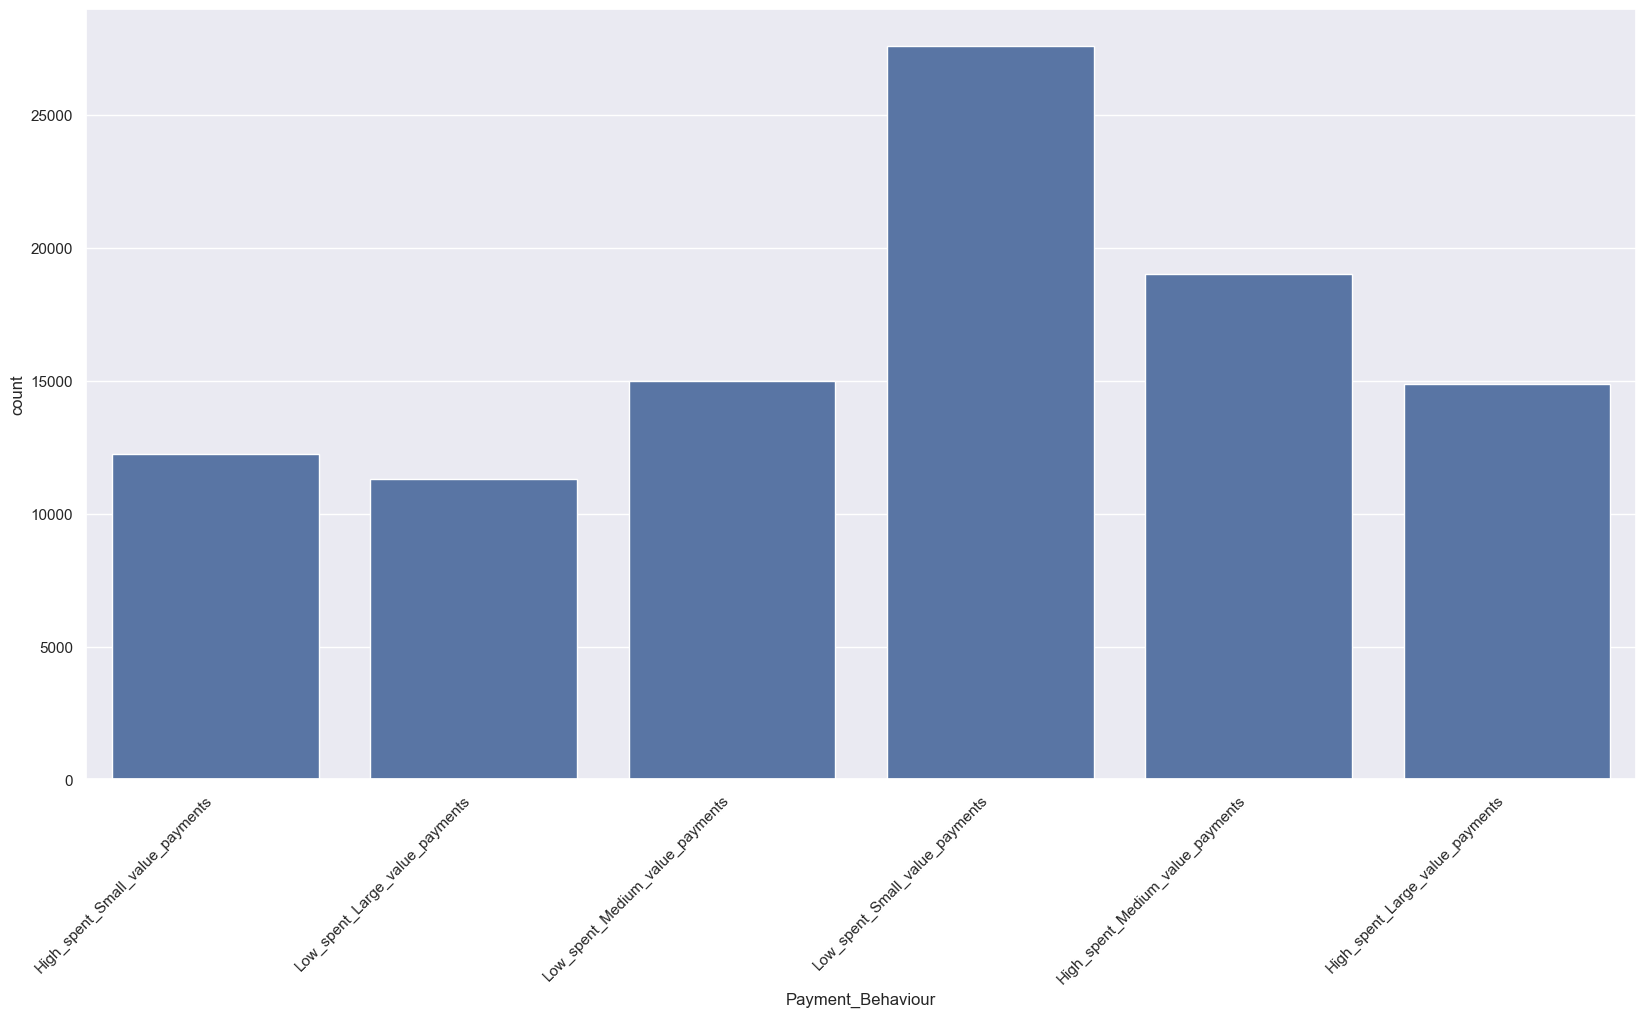

In [49]:
plot = sns.countplot(x='Payment_Behaviour', data=df)
plt.xticks(rotation=45, ha='right')
plt.show()

In [50]:
min_amount_count = df['Payment_of_Min_Amount'].value_counts()
min_amount_count

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

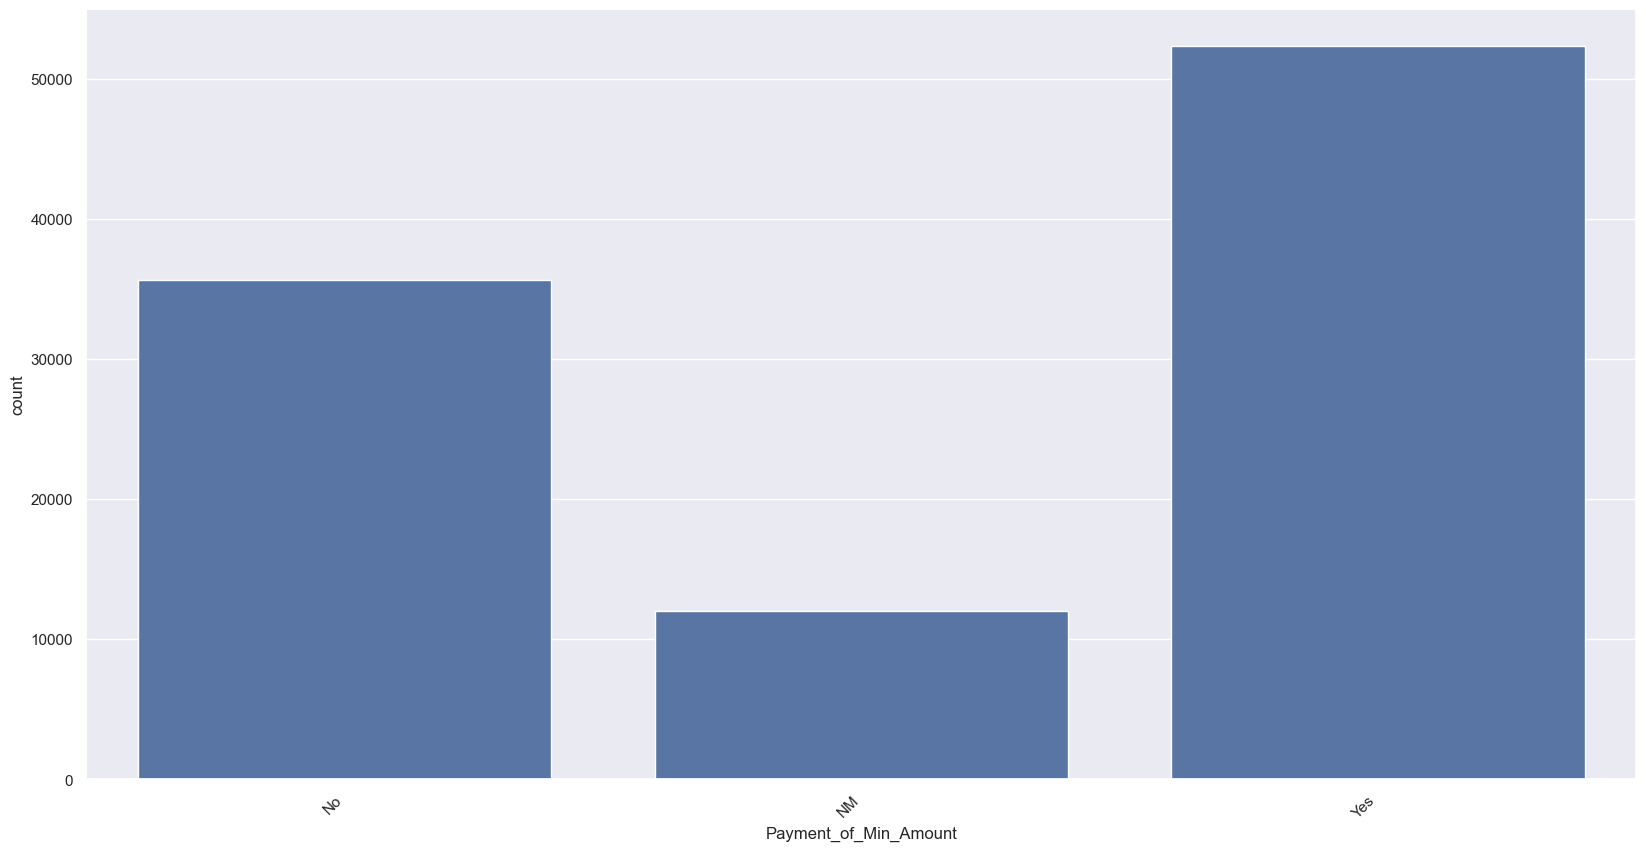

In [51]:
plot = sns.countplot(x='Payment_of_Min_Amount', data=df)
plt.xticks(rotation=45, ha='right')
plt.show()

In [52]:
df['Interest_Rate'] = df['Interest_Rate'].astype(float)
df['Interest_Rate'].value_counts()

Interest_Rate
8.0       5012
5.0       4979
6.0       4721
12.0      4540
10.0      4540
          ... 
4995.0       1
1899.0       1
2120.0       1
5762.0       1
5729.0       1
Name: count, Length: 1750, dtype: int64

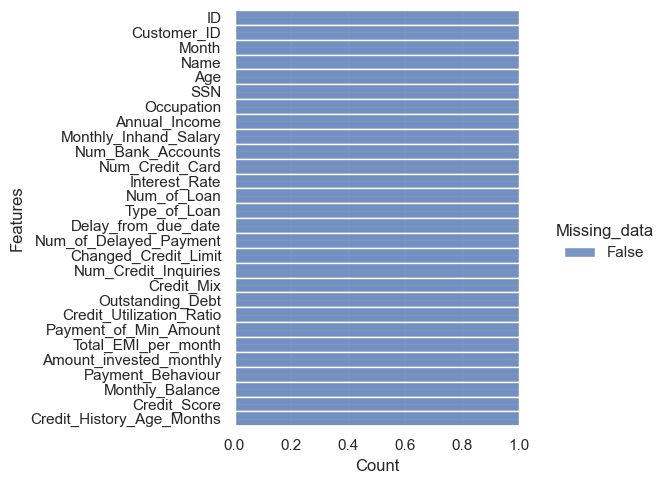

In [53]:
na_ratio_plot()

### All nans filled

#### Deleting the useless columns

In [54]:
df.drop(['ID','Customer_ID', 'Month', 'Name','SSN'], axis = 1, inplace = True)

In [55]:
df.dtypes

Age                            int64
Occupation                    object
Annual_Income                float64
Monthly_Inhand_Salary        float64
Num_Bank_Accounts              int64
Num_Credit_Card                int64
Interest_Rate                float64
Num_of_Loan                   object
Type_of_Loan                  object
Delay_from_due_date            int64
Num_of_Delayed_Payment        object
Changed_Credit_Limit         float64
Num_Credit_Inquiries         float64
Credit_Mix                    object
Outstanding_Debt              object
Credit_Utilization_Ratio     float64
Payment_of_Min_Amount         object
Total_EMI_per_month          float64
Amount_invested_monthly       object
Payment_Behaviour             object
Monthly_Balance              float64
Credit_Score                  object
Credit_History_Age_Months      int64
dtype: object

In [56]:
for col in ['Num_of_Delayed_Payment', 'Outstanding_Debt', 'Amount_invested_monthly','Num_of_Loan']:
    df[col] = df[col].str.replace('_', '').astype(float)

In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,3.517422e+01,1.526269e+01,14.000000,25.000000,34.000000,42.000000,1.000000e+02
Annual_Income,100000.0,1.764157e+05,1.429618e+06,7005.930000,19457.500000,37578.610000,72790.920000,2.419806e+07
Monthly_Inhand_Salary,100000.0,4.198351e+03,3.187402e+03,303.645417,1626.761667,3095.978333,5961.637500,1.520463e+04
Num_Bank_Accounts,100000.0,1.709128e+01,1.174048e+02,-1.000000,3.000000,6.000000,7.000000,1.798000e+03
Num_Credit_Card,100000.0,2.247443e+01,1.290574e+02,0.000000,4.000000,5.000000,7.000000,1.499000e+03
Interest_Rate,100000.0,7.246604e+01,4.664226e+02,1.000000,8.000000,13.000000,20.000000,5.797000e+03
Num_of_Loan,100000.0,1.076196e+01,6.178993e+01,0.000000,2.000000,3.000000,6.000000,1.496000e+03
Delay_from_due_date,100000.0,2.106878e+01,1.486010e+01,-5.000000,10.000000,18.000000,28.000000,6.700000e+01
Num_of_Delayed_Payment,100000.0,2.877941e+01,2.181148e+02,0.000000,8.000000,13.000000,18.000000,4.397000e+03
Changed_Credit_Limit,100000.0,1.038903e+01,6.718136e+00,-6.490000,5.420000,9.560000,14.660000,3.697000e+01


#### Distribution of different features depending on Credit Score

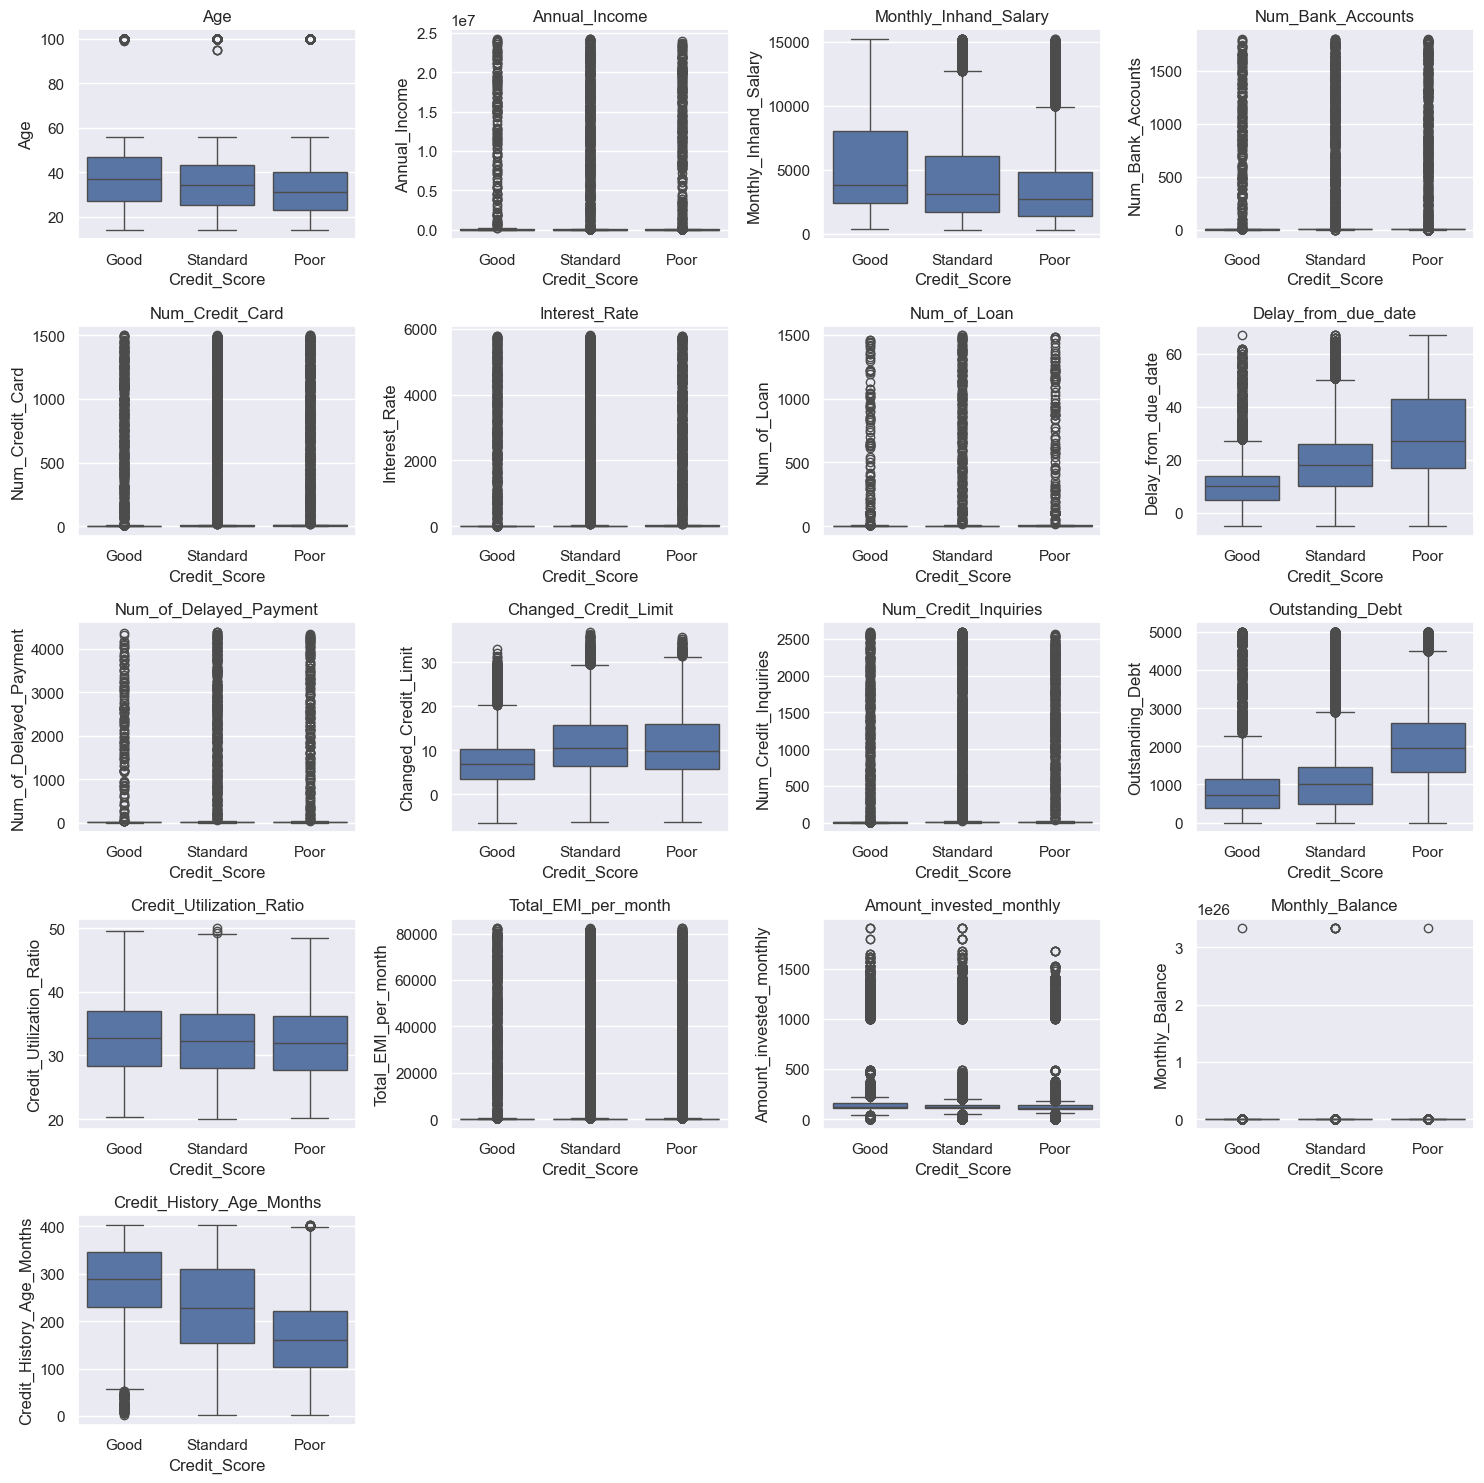

In [58]:
df_numeric_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

plt.figure(figsize=(15,15))
for i, col in enumerate(df_numeric_cols):
    plt.subplot(5, 4, i+1)
    sns.boxplot(x='Credit_Score', y=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()

#### Dropping the outliers

In [59]:
df_num = df.select_dtypes(include='number')
for column in df_num.columns:
    for i in df["Credit_Score"].unique():
        selected_i = df[df["Credit_Score"] == i]
        selected_column = selected_i[column]
        
        std = selected_column.std()
        mean= selected_column.mean()
        
        max = mean + (4 * std)
        min =  mean - (4 * std)
        
        outliers = selected_column[((selected_i[column] > max) | (selected_i[column] < min))].index
        df.drop(index=outliers, inplace=True)

In [60]:
df.shape

(86336, 23)

### Distribution of the target variable

In [61]:
df.Credit_Score.value_counts()

Credit_Score
Standard    45444
Poor        25357
Good        15535
Name: count, dtype: int64

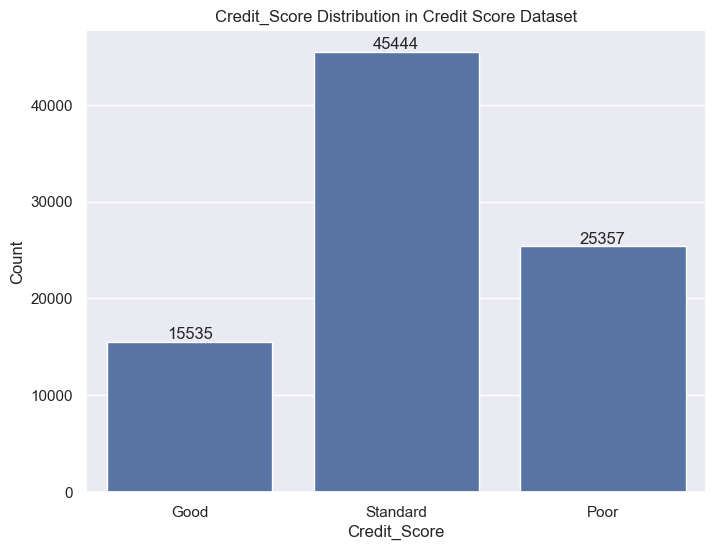

In [62]:
plt.figure(figsize=(8, 6))
ax=sns.countplot(data=df, x='Credit_Score')
ax.bar_label(ax.containers[0])
plt.title('Credit_Score Distribution in Credit Score Dataset')
plt.xlabel('Credit_Score')
plt.ylabel('Count')
plt.show()

### Correlation matrix on numeric features and target variable

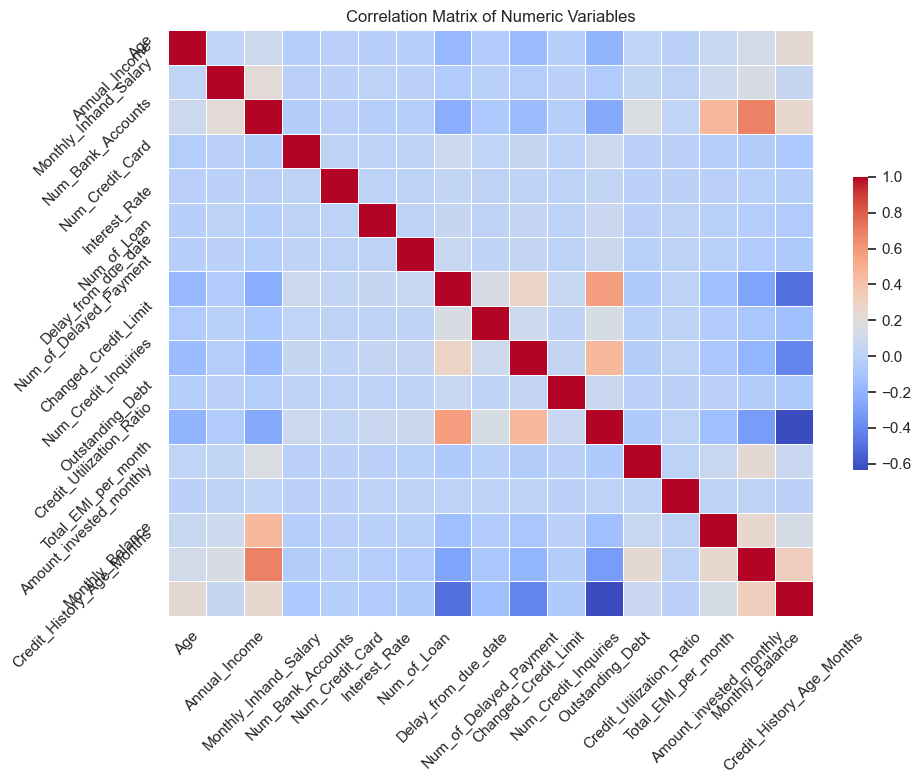

In [63]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm", fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

In [64]:
numeric_df_and_target = pd.concat([numeric_df, df["Credit_Score"].map({'Poor':1, 'Standard':2, 'Good':3})], axis=1)
min_max_corr = numeric_df_and_target.corr()['Credit_Score'].sort_values(ascending=False)
numeric_df_and_target.corr()['Credit_Score'].sort_values(ascending=False)

Credit_Score                 1.000000
Credit_History_Age_Months    0.409433
Monthly_Inhand_Salary        0.245530
Monthly_Balance              0.238199
Amount_invested_monthly      0.237343
Age                          0.167841
Annual_Income                0.059209
Credit_Utilization_Ratio     0.051608
Total_EMI_per_month          0.009227
Num_Credit_Card             -0.029899
Num_of_Loan                 -0.037751
Interest_Rate               -0.045248
Num_Credit_Inquiries        -0.047570
Num_Bank_Accounts           -0.058286
Num_of_Delayed_Payment      -0.110224
Changed_Credit_Limit        -0.182118
Outstanding_Debt            -0.410529
Delay_from_due_date         -0.449886
Name: Credit_Score, dtype: float64

#### Saving and reading again the cleaned data

In [65]:
df.to_csv("train_cleaned.csv", index=False)
df = pd.read_csv('train_cleaned.csv')
df.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,23,Scientist,19114.12,1824.843333,3,4,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,Good,809.98,26.822620,No,49.574949,118.280222,High_spent_Small_value_payments,312.494089,Good,265
1,23,Scientist,19114.12,1824.843333,3,4,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,...,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,265
2,23,Scientist,19114.12,1824.843333,3,4,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,...,Good,809.98,31.377862,No,49.574949,118.280222,Low_spent_Small_value_payments,223.451310,Good,268
3,23,Scientist,19114.12,1824.843333,3,4,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,...,Good,809.98,24.797347,No,49.574949,118.280222,High_spent_Medium_value_payments,341.489231,Good,269
4,23,Scientist,19114.12,1824.843333,3,4,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,...,Good,809.98,27.262259,No,49.574949,118.280222,High_spent_Medium_value_payments,340.479212,Good,270


#### Train test split and encoding of the target variable

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X = df.drop("Credit_Score", axis=1)
y = df["Credit_Score"].map({"Poor": 1, "Standard": 2, "Good": 3})

In [68]:
y.value_counts()

Credit_Score
2    45444
1    25357
3    15535
Name: count, dtype: int64

In [69]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=12)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((60435, 22), (25901, 22), (60435,), (25901,))

# 3) Baseline 

#### One hot encoding the categoricals and the logistic Regression

In [70]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report

In [71]:
X_train_categoricals = X_train.select_dtypes(include=["object"])
X_train_numerics = X_train.select_dtypes(exclude=["object"])
X_train_categoricals.head()

,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour
12331,Lawyer,Unknown,Good,No,High_spent_Large_value_payments
48768,Mechanic,"Student Loan, Auto Loan, Debt Consolidation Lo...",Standard,No,High_spent_Large_value_payments
15765,Media_Manager,"Personal Loan, and Mortgage Loan",Standard,No,Low_spent_Small_value_payments
49804,Manager,"Not Specified, Not Specified, and Home Equity ...",Good,No,High_spent_Large_value_payments
8552,Developer,Unknown,Good,No,High_spent_Small_value_payments


In [72]:
data = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown='ignore'), X_train_categoricals.columns),
        ("num", StandardScaler(), X_train_numerics.columns)
    ]
)

baseline_pipeline = Pipeline(steps=[
    ("encoding", data),
    ("clf", LogisticRegression(max_iter=1000))
])

In [73]:
model = baseline_pipeline.fit(X_train, y_train)

In [74]:
print(classification_report(y_val, model.predict(X_val), target_names=["Poor", "Standard", "Good"]))

              precision    recall  f1-score   support

        Poor       0.77      0.69      0.72      7611
    Standard       0.78      0.78      0.78     13615
        Good       0.62      0.73      0.67      4675

    accuracy                           0.74     25901
   macro avg       0.72      0.73      0.72     25901
weighted avg       0.75      0.74      0.74     25901



# 4) Smart encoding

In [75]:
X_train_categoricals.head()

,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour
12331,Lawyer,Unknown,Good,No,High_spent_Large_value_payments
48768,Mechanic,"Student Loan, Auto Loan, Debt Consolidation Lo...",Standard,No,High_spent_Large_value_payments
15765,Media_Manager,"Personal Loan, and Mortgage Loan",Standard,No,Low_spent_Small_value_payments
49804,Manager,"Not Specified, Not Specified, and Home Equity ...",Good,No,High_spent_Large_value_payments
8552,Developer,Unknown,Good,No,High_spent_Small_value_payments


#### Ordinal encoding of Credit_Mix, Payment_of_Min_Amount, Payment_Behaviour columns

In [76]:
X_train["Credit_Mix"].value_counts()

Credit_Mix
Standard    28088
Good        17752
Bad         14595
Name: count, dtype: int64

In [77]:
X_train["Credit_Mix"] = X_train["Credit_Mix"].map({"Bad":1, "Standard":2, "Good":3})
X_val["Credit_Mix"] = X_val["Credit_Mix"].map({"Bad":1, "Standard":2, "Good":3})
X_train["Credit_Mix"].value_counts()

Credit_Mix
2    28088
3    17752
1    14595
Name: count, dtype: int64

In [78]:
X_train["Payment_of_Min_Amount"].value_counts()

Payment_of_Min_Amount
Yes    32179
No     21034
NM      7222
Name: count, dtype: int64

In [79]:
X_train["Payment_of_Min_Amount"] = X_train["Payment_of_Min_Amount"].map({"No":-1, "NM":0, "Yes":1})
X_val["Payment_of_Min_Amount"] = X_val["Payment_of_Min_Amount"].map({"No":-1, "NM":0, "Yes":1})
X_train["Payment_of_Min_Amount"].value_counts()

Payment_of_Min_Amount
 1    32179
-1    21034
 0     7222
Name: count, dtype: int64

In [80]:
X_train["Payment_Behaviour"].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      17099
High_spent_Medium_value_payments    11460
Low_spent_Medium_value_payments      8998
High_spent_Large_value_payments      8597
High_spent_Small_value_payments      7428
Low_spent_Large_value_payments       6853
Name: count, dtype: int64

In [81]:
payment_behaviour_map = {"Low_spent_Small_value_payments":1,
                        "Low_spent_Medium_value_payments":2,
                        "Low_spent_Large_value_payments":3,
                        "High_spent_Small_value_payments":4,
                        "High_spent_Medium_value_payments":5,
                        "High_spent_Large_value_payments":6}
X_train["Payment_Behaviour"] = X_train["Payment_Behaviour"].map(payment_behaviour_map)
X_val["Payment_Behaviour"] = X_val["Payment_Behaviour"].map(payment_behaviour_map)
X_train["Payment_Behaviour"].value_counts()

Payment_Behaviour
1    17099
5    11460
2     8998
6     8597
4     7428
3     6853
Name: count, dtype: int64

In [82]:
X_train.shape, X_val.shape

((60435, 22), (25901, 22))

#### One Hot Encoding of Occupation column

In [83]:
encoder = OneHotEncoder(sparse_output=False, drop="first", handle_unknown='ignore')

encoded_occupations_train = encoder.fit_transform(X_train[["Occupation"]])
encoded_occupations_val = encoder.transform(X_val[["Occupation"]])

encoded_occupations_train_df = pd.DataFrame(encoded_occupations_train, columns=encoder.get_feature_names_out(['Occupation']))
encoded_occupations_val_df = pd.DataFrame(encoded_occupations_val, columns=encoder.get_feature_names_out(['Occupation']))

X_train.reset_index(drop=True, inplace=True)
encoded_occupations_train_df.reset_index(drop=True, inplace=True)

X_val.reset_index(drop=True, inplace=True)
encoded_occupations_val_df.reset_index(drop=True, inplace=True)

# Проверка количества строк
assert X_train.shape[0] == encoded_occupations_train_df.shape[0], "Количество строк не совпадает!"
assert X_val.shape[0] == encoded_occupations_val_df.shape[0], "Количество строк не совпадает!"

X_train = pd.concat([X_train, encoded_occupations_train_df], axis=1).drop('Occupation', axis=1)
X_val = pd.concat([X_val, encoded_occupations_val_df], axis=1).drop('Occupation', axis=1)

In [84]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60435 entries, 0 to 60434
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        60435 non-null  int64  
 1   Annual_Income              60435 non-null  float64
 2   Monthly_Inhand_Salary      60435 non-null  float64
 3   Num_Bank_Accounts          60435 non-null  int64  
 4   Num_Credit_Card            60435 non-null  int64  
 5   Interest_Rate              60435 non-null  float64
 6   Num_of_Loan                60435 non-null  float64
 7   Type_of_Loan               60435 non-null  object 
 8   Delay_from_due_date        60435 non-null  int64  
 9   Num_of_Delayed_Payment     60435 non-null  float64
 10  Changed_Credit_Limit       60435 non-null  float64
 11  Num_Credit_Inquiries       60435 non-null  float64
 12  Credit_Mix                 60435 non-null  int64  
 13  Outstanding_Debt           60435 non-null  flo

# 5) Feature engineering on Type_of_Loan

In [85]:
X_train.shape, X_val.shape

((60435, 35), (25901, 35))

In [86]:
X_train["Type_of_Loan"].value_counts()

Type_of_Loan
Unknown                                                                                                                                                    6682
Not Specified                                                                                                                                               806
Credit-Builder Loan                                                                                                                                         767
Student Loan                                                                                                                                                763
Personal Loan                                                                                                                                               751
                                                                                                                                                           ... 
Home Equity Loan, Credit-Bu

In [87]:
def get_types(column):
    types = set()
    for r in column.values:
        types = types.union(set(str(r).split(", ")))
    return types

In [88]:
print(get_types(X_train["Type_of_Loan"]))
types = ["Credit-Builder Loan", "Personal Loan", 
         "Debt Consolidation Loan", "Student Loan", 
         "Home Equity Loan", "Auto Loan", "Payday Loan",
         "Mortgage Loan", "Unknown"]

{'and Mortgage Loan', 'and Auto Loan', 'and Home Equity Loan', 'Payday Loan', 'Mortgage Loan', 'and Debt Consolidation Loan', 'Debt Consolidation Loan', 'and Not Specified', 'and Payday Loan', 'and Personal Loan', 'Unknown', 'Student Loan', 'Auto Loan', 'and Credit-Builder Loan', 'Personal Loan', 'and Student Loan', 'Home Equity Loan', 'Credit-Builder Loan', 'Not Specified'}


In [89]:
for type_i in types[:-1]:
    X_train[type_i] = X_train["Type_of_Loan"].str.contains(type_i, na=False).astype(int)
X_train["Unknown"] = X_train["Type_of_Loan"].isna() | \
                     X_train["Type_of_Loan"].str.contains("Unknown", na=False) | \
                     X_train["Type_of_Loan"].str.contains("Not Specified", na=False)
X_train["Unknown"] = X_train["Unknown"].astype(int)

for type_i in types[:-1]:
    X_val[type_i] = X_val["Type_of_Loan"].str.contains(type_i, na=False).astype(int)
X_val["Unknown"] = X_val["Type_of_Loan"].isna() | \
                   X_val["Type_of_Loan"].str.contains("Unknown", na=False) | \
                   X_val["Type_of_Loan"].str.contains("Not Specified", na=False)
X_val["Unknown"] = X_val["Unknown"].astype(int)

In [90]:
X_train.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Occupation_Writer,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Home Equity Loan,Auto Loan,Payday Loan,Mortgage Loan,Unknown
0,18,58961.86,4900.488333,2,115,8.0,0.0,Unknown,9,6.0,...,0.0,0,0,0,0,0,0,0,0,1
1,55,36274.17,3106.847500,8,4,15.0,4.0,"Student Loan, Auto Loan, Debt Consolidation Lo...",12,17.0,...,0.0,0,0,1,1,0,1,1,0,0
2,31,32411.63,2752.969167,8,7,6.0,2.0,"Personal Loan, and Mortgage Loan",6,17.0,...,0.0,0,1,0,0,0,0,0,1,0
3,40,70277.22,5633.435000,3,6,7.0,3.0,"Not Specified, Not Specified, and Home Equity ...",5,0.0,...,0.0,0,0,0,0,1,0,0,0,1
4,46,4644430.00,3792.167500,2,6,12.0,0.0,Unknown,11,11.0,...,0.0,0,0,0,0,0,0,0,0,1


In [91]:
X_train = X_train.drop("Type_of_Loan", axis=1)
X_val = X_val.drop("Type_of_Loan", axis=1)

In [92]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60435 entries, 0 to 60434
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        60435 non-null  int64  
 1   Annual_Income              60435 non-null  float64
 2   Monthly_Inhand_Salary      60435 non-null  float64
 3   Num_Bank_Accounts          60435 non-null  int64  
 4   Num_Credit_Card            60435 non-null  int64  
 5   Interest_Rate              60435 non-null  float64
 6   Num_of_Loan                60435 non-null  float64
 7   Delay_from_due_date        60435 non-null  int64  
 8   Num_of_Delayed_Payment     60435 non-null  float64
 9   Changed_Credit_Limit       60435 non-null  float64
 10  Num_Credit_Inquiries       60435 non-null  float64
 11  Credit_Mix                 60435 non-null  int64  
 12  Outstanding_Debt           60435 non-null  float64
 13  Credit_Utilization_Ratio   60435 non-null  flo

### Scaling

In [93]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
X_train.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation_Writer,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Home Equity Loan,Auto Loan,Payday Loan,Mortgage Loan,Unknown
0,-1.415961,0.026839,0.310036,-0.246840,3.941797,-0.145019,-0.386117,-0.823359,-0.334476,-0.203949,...,-0.258738,-0.688755,-0.675136,-0.673604,-0.677007,-0.678931,-0.666009,-0.692048,-0.679555,1.150914
1,2.018937,-0.110024,-0.295465,0.096456,-0.134524,-0.068531,-0.179268,-0.622161,0.179783,-0.214396,...,-0.258738,-0.688755,-0.675136,1.484551,1.477090,-0.678931,1.501480,1.444987,-0.679555,-0.868875
2,-0.209105,-0.133325,-0.414928,0.096456,-0.024353,-0.166873,-0.282692,-1.024557,0.179783,-0.394984,...,-0.258738,-0.688755,1.481182,-0.673604,-0.677007,-0.678931,-0.666009,-0.692048,1.471551,-0.868875
3,0.626411,0.095098,0.557465,-0.189624,-0.061077,-0.155946,-0.230980,-1.091622,-0.614981,0.093049,...,-0.258738,-0.688755,-0.675136,-0.673604,-0.677007,1.472904,-0.666009,-0.692048,-0.679555,1.150914
4,1.183421,27.688547,-0.064113,-0.246840,-0.061077,-0.101312,-0.386117,-0.689227,-0.100722,-0.259170,...,-0.258738,-0.688755,-0.675136,-0.673604,-0.677007,-0.678931,-0.666009,-0.692048,-0.679555,1.150914


# 6) Classic ML models

### 1. KNN

In [94]:
from sklearn.neighbors import KNeighborsClassifier

In [95]:
knn = KNeighborsClassifier().fit(X_train, y_train)
print(classification_report(y_val, knn.predict(X_val)))

              precision    recall  f1-score   support

           1       0.71      0.75      0.73      7611
           2       0.76      0.77      0.77     13615
           3       0.71      0.63      0.67      4675

    accuracy                           0.74     25901
   macro avg       0.73      0.72      0.72     25901
weighted avg       0.74      0.74      0.74     25901



### 2. Decision Tree

In [96]:
from sklearn.tree import DecisionTreeClassifier

In [97]:
dtc = DecisionTreeClassifier().fit(X_train, y_train)
print(classification_report(y_val, dtc.predict(X_val)))

              precision    recall  f1-score   support

           1       0.73      0.73      0.73      7611
           2       0.76      0.77      0.76     13615
           3       0.72      0.71      0.71      4675

    accuracy                           0.74     25901
   macro avg       0.74      0.73      0.73     25901
weighted avg       0.74      0.74      0.74     25901



### 3. Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
rf = RandomForestClassifier().fit(X_train, y_train)
print(classification_report(y_val, rf.predict(X_val)))

              precision    recall  f1-score   support

           1       0.79      0.84      0.81      7611
           2       0.84      0.81      0.83     13615
           3       0.81      0.79      0.80      4675

    accuracy                           0.82     25901
   macro avg       0.81      0.81      0.81     25901
weighted avg       0.82      0.82      0.82     25901



### 4. Gradient Boosting

In [100]:
from sklearn.ensemble import GradientBoostingClassifier

In [101]:
gb = GradientBoostingClassifier(max_depth=3, n_estimators=1000).fit(X_train, y_train)
print(classification_report(y_val, gb.predict(X_val)))

              precision    recall  f1-score   support

           1       0.76      0.75      0.75      7611
           2       0.80      0.79      0.79     13615
           3       0.71      0.75      0.73      4675

    accuracy                           0.77     25901
   macro avg       0.76      0.76      0.76     25901
weighted avg       0.77      0.77      0.77     25901



### 5. CatBoost 

In [102]:
cb = CatBoostClassifier().fit(X_train, y_train, verbose=False)

In [103]:
print(classification_report(y_val, cb.predict(X_val)))

              precision    recall  f1-score   support

           1       0.77      0.76      0.76      7611
           2       0.81      0.80      0.80     13615
           3       0.73      0.76      0.74      4675

    accuracy                           0.78     25901
   macro avg       0.77      0.77      0.77     25901
weighted avg       0.78      0.78      0.78     25901



# 7) Multilayer Perceptron 

### 1. without dropout and batchnorm

In [121]:
y_train = y_train - 1
y_val = y_val - 1 

In [122]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [175]:
learning_rate = 0.01
batch_size = 512
num_epochs = 1200
patience = 60

In [176]:
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.BatchNorm1d(512), 
            nn.ReLU(),
            nn.Dropout(0.3),     
            nn.Linear(512, 256),
            nn.BatchNorm1d(256), 
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128), 
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),  
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 3),    
            nn.Softmax(dim=1)    
        )

    def forward(self, x):
        return self.network(x)


In [177]:
X_train_tensor = torch.FloatTensor(X_train.values)
y_train_tensor = torch.LongTensor(y_train.values)
X_val_tensor = torch.FloatTensor(X_val.values)
y_val_tensor = torch.LongTensor(y_val.values)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Initialize model, loss function, and optimizer
input_dim = X_train.shape[1]
model = MLP(input_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Early stopping variables
best_val_accuracy = 0
patience_counter = 0

# Training loop
for epoch in range(num_epochs):
    model.train()
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    
    # Validation
    model.eval()
    val_accuracy = 0
    with torch.no_grad():
        for data, target in val_loader:
            output = model(data)
            preds = output.argmax(dim=1)
            val_accuracy += (preds == target).float().sum().item()
    val_accuracy /= len(val_loader.dataset)

    print(f"Epoch {epoch+1}/{num_epochs}, Validation Accuracy: {val_accuracy:.4f}")

    # Early stopping check
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        patience_counter = 0
        # Save best model weights if needed here
    else:
        patience_counter += 1

    if patience_counter >= patience:
        print("Early stopping triggered.")
        break
    elif patience_counter >= patience//4:
        learning_rate/=10


Epoch 1/1200, Validation Accuracy: 0.6856
Epoch 2/1200, Validation Accuracy: 0.6884
Epoch 3/1200, Validation Accuracy: 0.6902
Epoch 4/1200, Validation Accuracy: 0.6902
Epoch 5/1200, Validation Accuracy: 0.6942
Epoch 6/1200, Validation Accuracy: 0.6951
Epoch 7/1200, Validation Accuracy: 0.6942
Epoch 8/1200, Validation Accuracy: 0.6991
Epoch 9/1200, Validation Accuracy: 0.7010
Epoch 10/1200, Validation Accuracy: 0.7058
Epoch 11/1200, Validation Accuracy: 0.7074
Epoch 12/1200, Validation Accuracy: 0.7107
Epoch 13/1200, Validation Accuracy: 0.7026
Epoch 14/1200, Validation Accuracy: 0.7087
Epoch 15/1200, Validation Accuracy: 0.7139
Epoch 16/1200, Validation Accuracy: 0.7155
Epoch 17/1200, Validation Accuracy: 0.7174
Epoch 18/1200, Validation Accuracy: 0.7172
Epoch 19/1200, Validation Accuracy: 0.7171
Epoch 20/1200, Validation Accuracy: 0.7218
Epoch 21/1200, Validation Accuracy: 0.7198
Epoch 22/1200, Validation Accuracy: 0.7233
Epoch 23/1200, Validation Accuracy: 0.7228
Epoch 24/1200, Valid

In [186]:
print(classification_report(y_val, torch.argmax(model(X_val_tensor), dim=1)))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78      7611
           1       0.80      0.81      0.81     13615
           2       0.78      0.70      0.74      4675

    accuracy                           0.79     25901
   macro avg       0.78      0.77      0.78     25901
weighted avg       0.79      0.79      0.79     25901



# Top3 Models on validation sample:
### 1) RandomForest (accuracy 0.82, weighted f1-score 0.82)
### 2) Multi-Layer Perceptron (accuracy 0.79, weighted f1-score 0.79)
### 3) CatBoost Gradient Boosting (accuracy 0.78, weighted f1-score 0.78)